Binary classification = one or other like Cat or Dog , Spam or no spam

Multi-class classification = more than one thing 


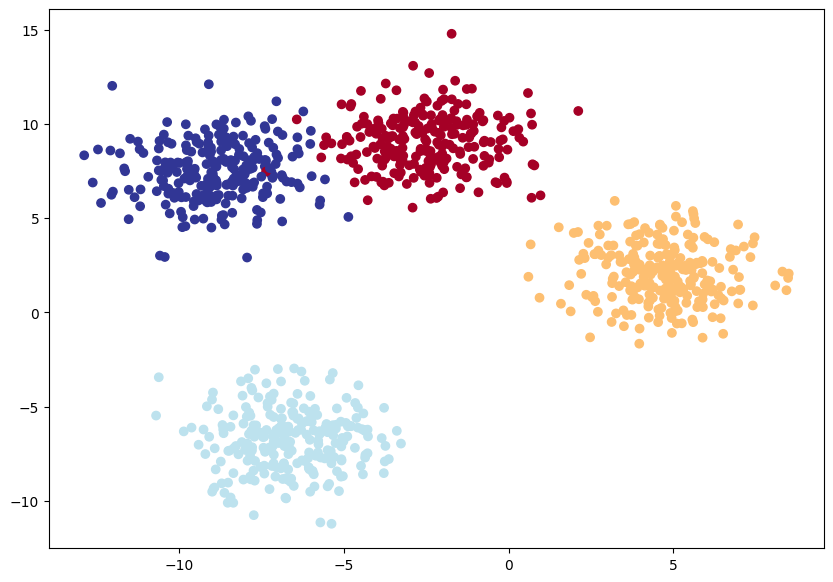

In [1]:
# create toy dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#  set the hyperparameters for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEEDS = 42


#  create multiclass data

X_blob , Y_blob = make_blobs(n_samples=1000 , n_features=NUM_FEATURES ,
                              centers=NUM_CLASSES ,
                             cluster_std=1.5 , random_state=RANDOM_SEEDS)



#  Turn data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
Y_blob = torch.from_numpy(Y_blob).type(torch.float)

#  split into train and test
X_blob_train , X_blob_test , Y_blob_train , Y_blob_test = train_test_split(X_blob , Y_blob ,test_size=0.2 , random_state=RANDOM_SEEDS)

#  plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0] , X_blob[: ,1] , c=Y_blob , cmap=plt.cm.RdYlBu )







In [12]:
#  create a multiclass classification model
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

#  build a model

class BlobModel(nn.Module):
    def __init__(self, input_features , output_features , hidden_units=8 ):
        super().__init__()
        self.input_features = input_features
        self.output_features = output_features
        self.hidden_units = hidden_units
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units , out_features=output_features)

        )

    
    def forward(self , x):
        return self.linear_layer_stack(x)
    

#  create an instance of blobclass and sed it to the target device
    
model_4 = BlobModel(input_features=2, output_features=4 , hidden_units=8).to(device)

model_4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [8]:
X_blob_train.shape , Y_blob_train[:10]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0.]))

In [13]:
#  create a loss fn and optimizer for multiclass model

#  create a loss function for multi-class classification

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters() , lr=0.1 )





In [19]:
#  getting prediction probability for a multiclass pyTorch model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10] , Y_blob_test[:10]

(tensor([[ 2.8128e-01,  8.0103e-01,  6.9247e-01,  2.1236e-01],
         [-2.1833e-01,  4.6315e-02,  1.7063e+00,  2.6587e-01],
         [-1.2026e+00,  5.2211e-02,  2.1047e+00,  8.1782e-01],
         [ 2.7626e-01,  4.6670e-01,  4.5412e-01,  6.0840e-02],
         [ 3.2858e-01,  9.7998e-01,  7.1033e-01,  1.0424e-01],
         [-3.3531e-01, -3.6364e-02,  2.0504e+00,  4.0016e-01],
         [-1.1303e+00,  2.6931e-01,  1.7413e+00,  7.2309e-01],
         [ 3.3744e-01,  8.1375e-01,  5.4552e-01, -1.5102e-02],
         [-1.4243e+00, -2.4988e-01,  2.7390e+00,  1.0318e+00],
         [ 3.3092e-01,  8.2779e-01,  5.8951e-01,  9.4562e-04]]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

In [23]:
#  convert our models logit output to prediction probabilites

Y_pred_probs = torch.softmax(y_logits , dim=1 )
print(y_logits[:5])
print(Y_pred_probs[:10])



tensor([[ 0.2813,  0.8010,  0.6925,  0.2124],
        [-0.2183,  0.0463,  1.7063,  0.2659],
        [-1.2026,  0.0522,  2.1047,  0.8178],
        [ 0.2763,  0.4667,  0.4541,  0.0608],
        [ 0.3286,  0.9800,  0.7103,  0.1042]])
tensor([[0.1952, 0.3282, 0.2944, 0.1822],
        [0.0928, 0.1209, 0.6358, 0.1506],
        [0.0254, 0.0891, 0.6939, 0.1916],
        [0.2375, 0.2873, 0.2837, 0.1915],
        [0.1930, 0.3702, 0.2827, 0.1542],
        [0.0654, 0.0881, 0.7102, 0.1364],
        [0.0344, 0.1393, 0.6070, 0.2193],
        [0.2201, 0.3543, 0.2710, 0.1547],
        [0.0125, 0.0404, 0.8017, 0.1454],
        [0.2147, 0.3529, 0.2781, 0.1544]])


In [27]:
print(torch.sum(Y_pred_probs[1]))
Y_pred_probs[5]

tensor(1.)


tensor([0.0654, 0.0881, 0.7102, 0.1364])

In [40]:
torch.argmax(Y_pred_probs[1] )

#  convert our model's prediction probabilities to pred labels

y_preds = torch.argmax(Y_pred_probs  ,dim=1)

print(Y_pred_probs[:10])
y_preds[:10] , Y_blob_test[:100]


tensor([[0.1952, 0.3282, 0.2944, 0.1822],
        [0.0928, 0.1209, 0.6358, 0.1506],
        [0.0254, 0.0891, 0.6939, 0.1916],
        [0.2375, 0.2873, 0.2837, 0.1915],
        [0.1930, 0.3702, 0.2827, 0.1542],
        [0.0654, 0.0881, 0.7102, 0.1364],
        [0.0344, 0.1393, 0.6070, 0.2193],
        [0.2201, 0.3543, 0.2710, 0.1547],
        [0.0125, 0.0404, 0.8017, 0.1454],
        [0.2147, 0.3529, 0.2781, 0.1544]])


(tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 1]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
         3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
         1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
         3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
         3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
         3., 3., 1., 3., 3., 3., 1., 0., 3., 2.]))

In [41]:
def accuracy_fn(Y_True , Y_Pred):
    correct = torch.eq(Y_True , Y_Pred).sum().item()
    acc = (correct/len(Y_Pred)) * 100
    return acc

In [45]:
#  creating the training and testing loop for multi class classification

torch.manual_seed = 42 
torch.cuda.manual_seed = 42

epochs = 100

X_blob_train , Y_blob_train  = X_blob_train.to(device) , Y_blob_train.to(device)
X_blob_test , Y_blob_test = X_blob_test.to(device) , Y_blob_test.to(device)

#  loop through data

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_preds = torch.softmax(y_logits , dim=1).argmax(dim=1)

    loss = loss_fn(y_logits , Y_blob_train.type(torch.long) )
    acc = accuracy_fn(Y_True=Y_blob_train , Y_Pred=y_preds)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    #  testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds  = torch.softmax(test_logits , dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits , Y_blob_test.type(torch.long))
        test_acc = accuracy_fn(Y_True=Y_blob_test , Y_Pred=test_preds )

    # print out what's happening
    if epoch % 10 == 0 :
        print(f"Epoch : {epoch} | loss : {loss} | acc : {acc} | test loss : {test_loss} | test acc : {test_acc} ")






Epoch : 0 | loss : 0.03545701876282692 | acc : 99.25 | test loss : 0.025470631197094917 | test acc : 99.5 
Epoch : 10 | loss : 0.033421240746974945 | acc : 99.25 | test loss : 0.02355332113802433 | test acc : 99.5 
Epoch : 20 | loss : 0.031846433877944946 | acc : 99.25 | test loss : 0.022056471556425095 | test acc : 99.5 
Epoch : 30 | loss : 0.030596956610679626 | acc : 99.25 | test loss : 0.020841944962739944 | test acc : 99.5 
Epoch : 40 | loss : 0.029588868841528893 | acc : 99.25 | test loss : 0.019853640347719193 | test acc : 99.5 
Epoch : 50 | loss : 0.028759252279996872 | acc : 99.25 | test loss : 0.019047239795327187 | test acc : 99.5 
Epoch : 60 | loss : 0.028065232560038567 | acc : 99.25 | test loss : 0.018357135355472565 | test acc : 99.5 
Epoch : 70 | loss : 0.02747582271695137 | acc : 99.25 | test loss : 0.01776340790092945 | test acc : 99.5 
Epoch : 80 | loss : 0.026969874277710915 | acc : 99.25 | test loss : 0.017241232097148895 | test acc : 99.5 
Epoch : 90 | loss : 0.02

In [48]:
#  making and evaluting prediction with pytorch

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10] , Y_blob_test[:10]


(tensor([[  4.1184,  10.3228,  -4.8945,  -2.2078],
         [  2.6202,  -8.3715,  -0.1840,   7.9691],
         [ -7.0044,  -4.3062,   9.8274,   1.0230],
         [  1.5248,   6.8868,  -2.8335,  -0.8134],
         [  9.6125,   3.8567,  -6.4973,  -0.4819],
         [  2.6217, -10.3977,   0.1863,   9.7624],
         [ -5.8573,  -3.4011,   8.1297,   0.7861],
         [  8.9520,  -0.0813,  -5.3932,   0.9868],
         [ -8.6472,  -7.2674,  12.2734,   2.9558],
         [  9.0171,   1.1636,  -5.5700,   0.3508]]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

In [50]:
y_preds = torch.softmax(y_logits , dim=1 ).argmax(dim=1)

y_preds[:10] , Y_blob_test[:10] 

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

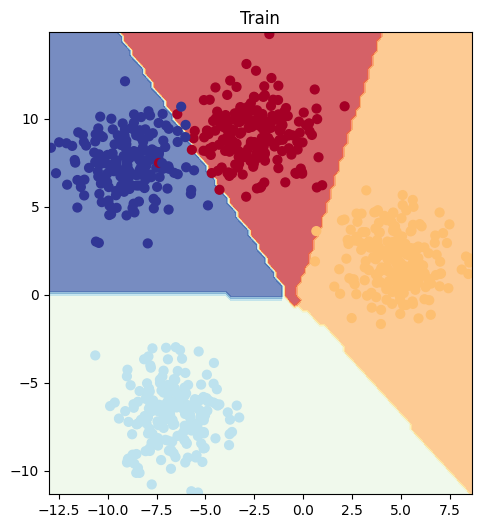

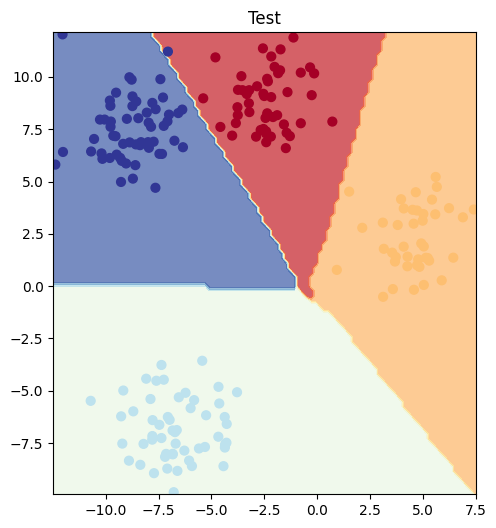

In [54]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4 , X_blob_train , Y_blob_train )

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_4 , X_blob_test , Y_blob_test )

In [77]:
from torchmetrics import Accuracy

torchmetrix_accuracy =  Accuracy(task='multiclass' , num_classes=NUM_CLASSES)

y_preds.type()

torchmetrix_accuracy(y_preds , Y_blob_test)

tensor(0.9950)